In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tifffile as tiff
import rasterio
from pathlib import Path

In [ ]:
directory = Path('./dataset/D2/test/')
dataset = list(directory.glob('*.tif'))

In [ ]:
def display_false_color_composite(img):
    def normalize_band(band):
        return (band - band.min()) / (band.max() - band.min())

    nir = normalize_band(img[:, :, 4])
    red = normalize_band(img[:, :, 0])
    green = normalize_band(img[:, :, 1])

    false_color = np.dstack((nir, red, green))

    plt.imshow(false_color)
    plt.axis("off")
    plt.title("False Color Composite (NIR-Red-Green)")
    plt.show()


In [ ]:
def display_rgb_composite(img):
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]

    rgb = np.dstack((red, green, blue))

    plt.imshow(rgb)
    plt.axis("off")
    plt.title("RGB Composite")
    plt.show()

In [ ]:
img = dataset[0]
img = tiff.imread(img)
# display properties of the image
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")


In [ ]:
for image in dataset[:5]:
    img = tiff.imread(image)
    display_rgb_composite(img)

In [ ]:
for image in dataset[:5]:
    img = tiff.imread(image)
    display_false_color_composite(img)

In [ ]:
# Function to display an image
def show_image(image, title, cmap='gray'):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

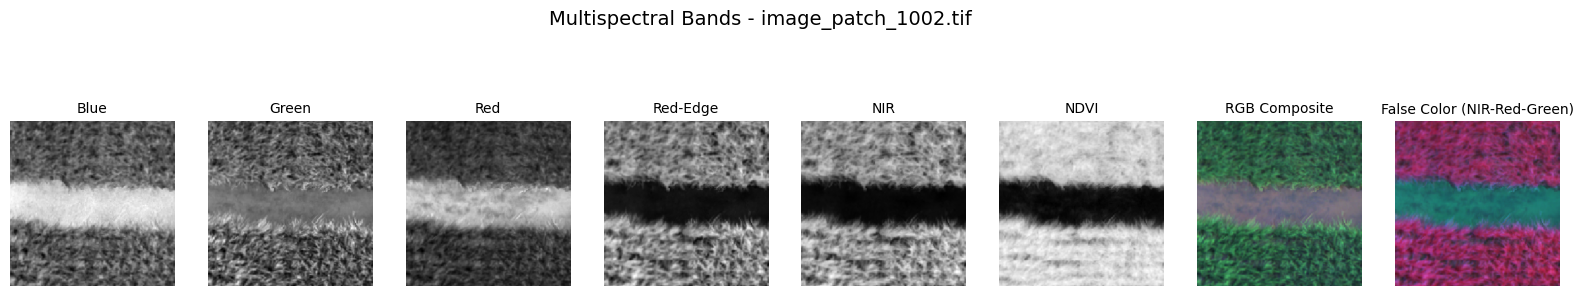

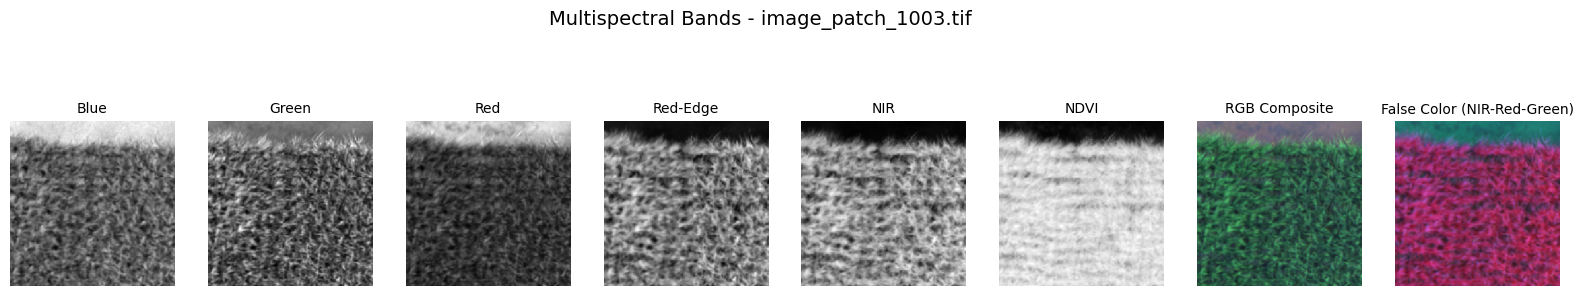

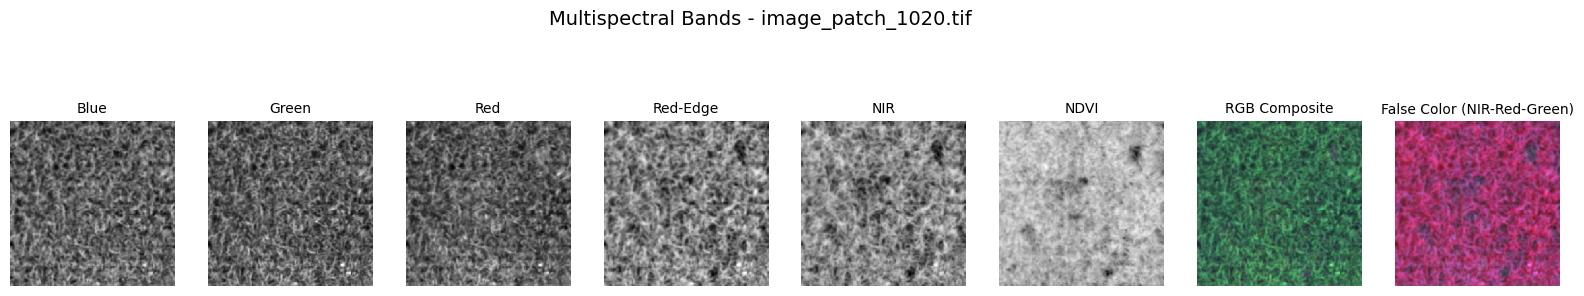

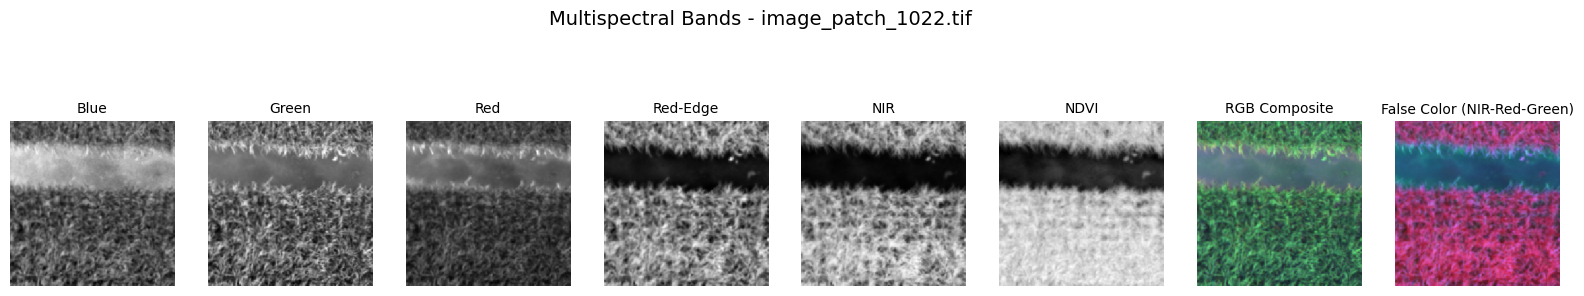

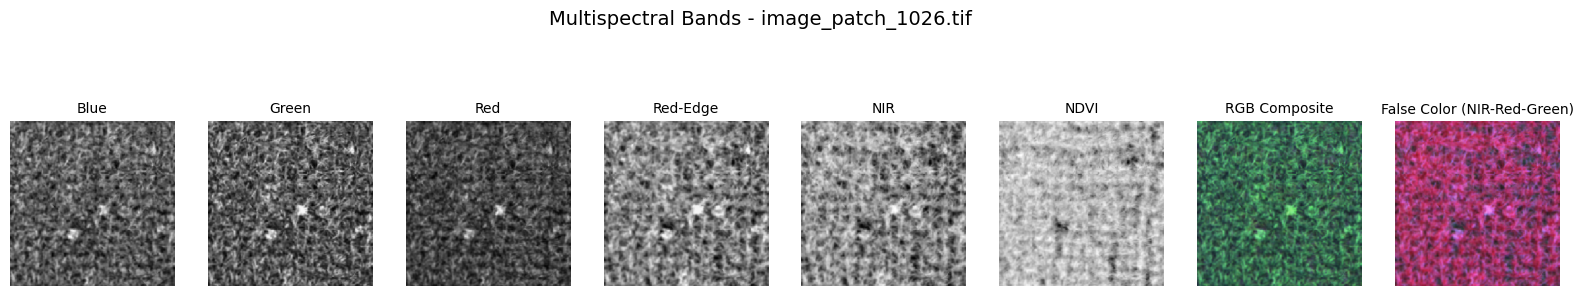

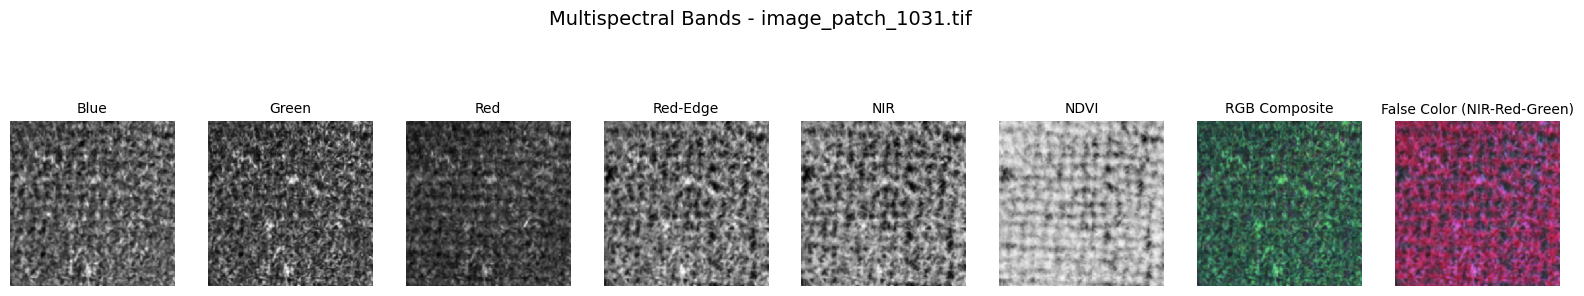

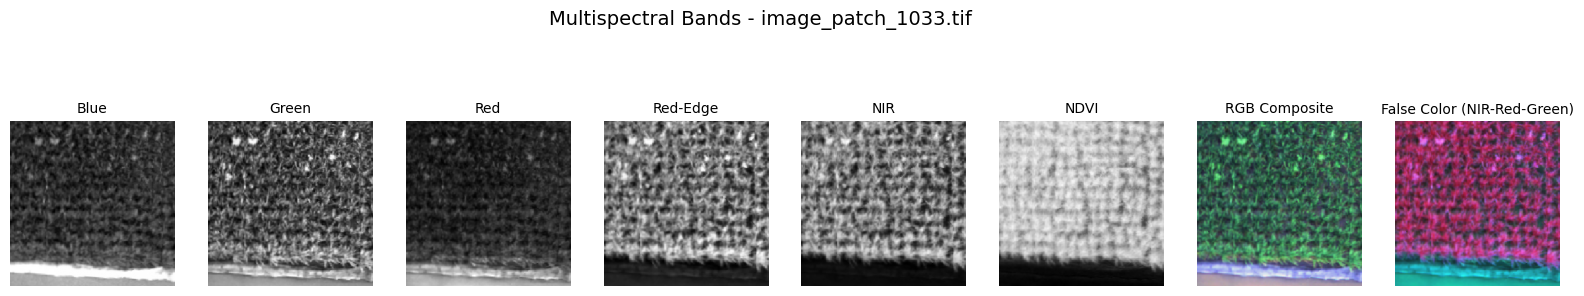

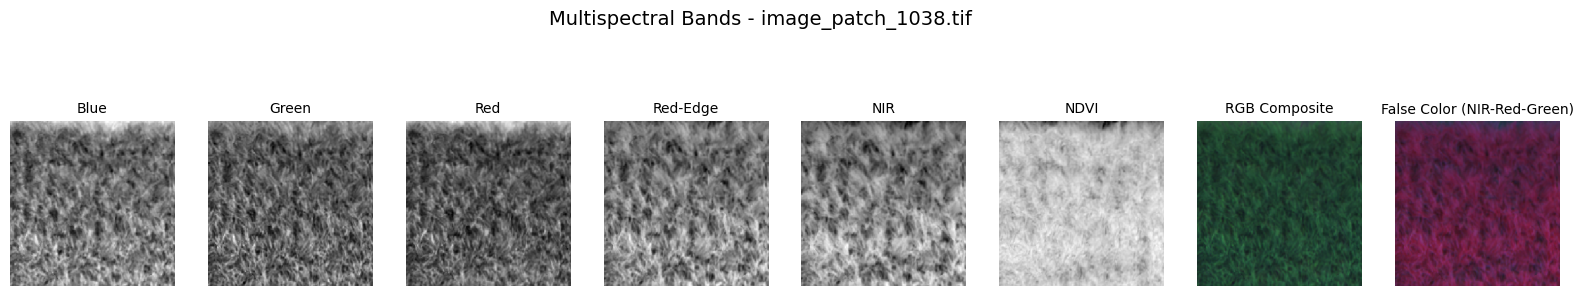

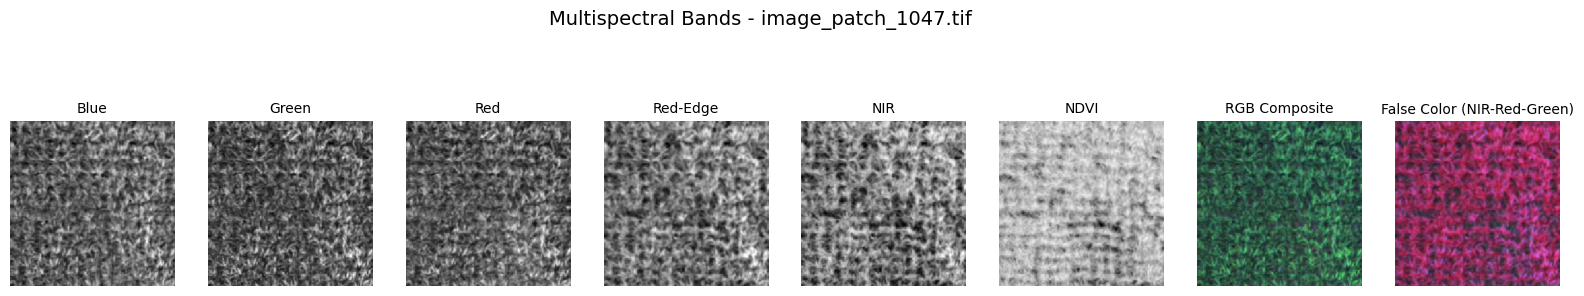

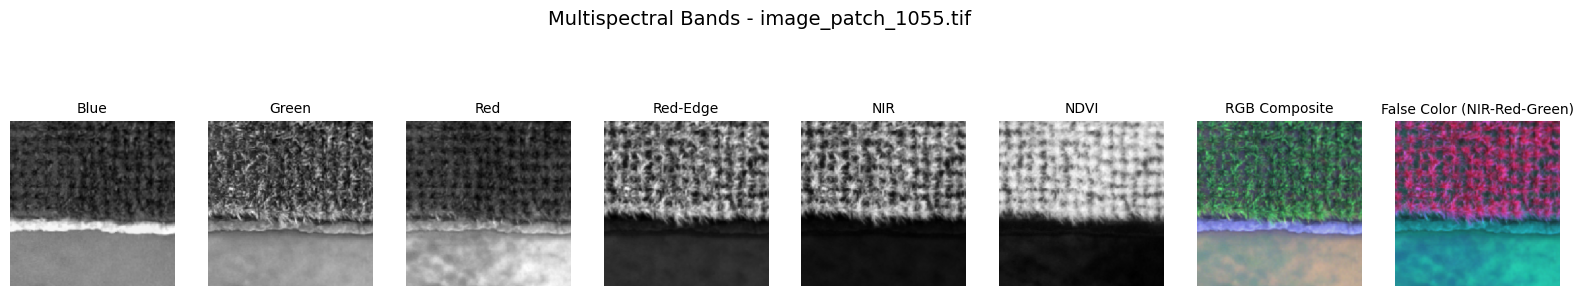

In [8]:
# Process each TIFF file
for tif_file in dataset[:10]:
    with rasterio.open(tif_file) as src:
        # Read all bands
        blue = src.read(1)      # Band 1
        green = src.read(2)     # Band 2
        red = src.read(3)       # Band 3
        red_edge = src.read(4)  # Band 4
        nir = src.read(5)       # Band 5
        ndvi = src.read(6)      # Band 6 (already computed)

        # Create composites
        rgb = np.dstack((red, green, blue))  # RGB Composite
        false_color = np.dstack((nir, red, green))  # False Color Composite (NIR-Red-Green)

        # Titles for subplots
        titles = ["Blue", "Green", "Red", "Red-Edge", "NIR", "NDVI", "RGB Composite", "False Color (NIR-Red-Green)"]
        images = [blue, green, red, red_edge, nir, ndvi, rgb, false_color]

        # Plot all images in a single row
        fig, axes = plt.subplots(1, len(images), figsize=(20, 4))
        fig.suptitle(f"Multispectral Bands - {tif_file.name}", fontsize=14)

        for ax, img, title in zip(axes, images, titles):
            ax.imshow(img, cmap="gray" if title not in ["RGB Composite", "False Color (NIR-Red-Green)"] else None)
            ax.set_title(title, fontsize=10)
            ax.axis("off")

        plt.show()